In [1]:
from pandas_datareader import data as pdr
from yahoo_fin import stock_info as si
import yfinance as yf
import pandas as pd
import datetime
import time
import talib
from talib import *
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import xgboost as xgb
import numpy as np
import pickle
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
yf.pdr_override()

In [2]:
def add_indicators():
        
    upper_band, mid_band, lower_band = BBANDS(df['Adj Close'],timeperiod=really_fast, nbdevup=2, nbdevdn=2, matype=0)
    d_ema = DEMA(df['Adj Close'], timeperiod=really_fast)
    E_M_A = EMA(df['Adj Close'], timeperiod=fast)
    ht_trend = HT_TRENDLINE(df['Adj Close'])
    kama = KAMA(df['Adj Close'], timeperiod=fast)
    ma = MA(df['Adj Close'], timeperiod=fast, matype=0)
    #mama, fama = MAMA(df['Adj Close'], fastlimit=really_fast, slowlimit=slow) < this gave me issues?
    #mavp = MAVP(df['Adj Close'])
    mid = MIDPOINT(df['Adj Close'], timeperiod=fast)
    mid_price = MIDPRICE(df['High'], df['Low'], timeperiod=fast)
    sar = SAR(df['High'], df['Low'], acceleration=.02, maximum=.2)
    sarext = SAREXT(df['High'], df['Low'], startvalue=0, offsetonreverse=0, accelerationinitlong=.02, accelerationlong=.02, accelerationmaxlong=.2, accelerationinitshort=.02, accelerationshort=.02, accelerationmaxshort=.2)
    sma = SMA(df['Adj Close'], timeperiod=slow)
    tema = TEMA(df['Adj Close'], timeperiod=slow)
    trima = TRIMA(df['Adj Close'], timeperiod=slow)
    wma = WMA(df['Adj Close'], timeperiod=slow)

    #this is some of the beginning stuff

    O_B_V = OBV(df['Adj Close'], df['Volume'])
    A_D_O_S_C = ADOSC(df['High'], df['Low'], df['Adj Close'], df['Volume'], fastperiod=fast, slowperiod=slow)
    O_G_chaikin = AD(df['High'], df['Low'], df['Adj Close'], df['Volume'])
    HT_DCper = HT_DCPERIOD(df['Adj Close'])
    HT_DCphase = HT_DCPHASE(df['Adj Close'])
    inphase, quad = HT_PHASOR(df['Adj Close'])
    r_sin, leadsin = HT_SINE(df['Adj Close'])

    #volatility
    atr = ATR(df['High'], df['Low'], df['Adj Close'], timeperiod=slow)
    natr = NATR(df['High'], df['Low'], df['Adj Close'], timeperiod=slow)
    t_range = TRANGE(df['High'], df['Low'], df['Adj Close'])

    #below here are momentum ind

    adx = ADX(df['High'], df['Low'], df['Adj Close'], timeperiod=fast)
    adxr = ADXR(df['High'], df['Low'], df['Adj Close'], timeperiod=fast)
    apo = APO(df['Adj Close'], fastperiod=really_fast, slowperiod=fast, matype=0)
    aroon_d, aroon_u = AROON(df['High'], df['Low'], timeperiod=fast)
    aroon_osc = AROONOSC(df['High'], df['Low'], timeperiod=fast)
    bop = BOP(df['Open'], df['High'], df['Low'], df['Adj Close'])
    cci = CCI(df['High'], df['Low'], df['Adj Close'], timeperiod=fast)
    cmo = CMO(df['Adj Close'], timeperiod=fast)
    dx = DX(df['High'], df['Low'], df['Adj Close'], timeperiod=fast)
    macd, macdsig, macdhist = MACD(df['Adj Close'], fastperiod=fast, slowperiod=slow, signalperiod=really_fast)
    macdex, macdexsig, macdexhist = MACDEXT(df['Adj Close'], fastperiod=fast, fastmatype=0, slowperiod=slow, slowmatype=0, signalperiod=really_fast, signalmatype=0)
    macdfixd, macdfixdsig, macdfixdhist = MACDFIX(df['Adj Close'], signalperiod=really_fast)
    # more momo's

    mfi = MFI(df['High'], df['Low'], df['Adj Close'],df['Volume'],timeperiod=fast)
    min_di = MINUS_DI(df['High'], df['Low'], df['Adj Close'], timeperiod=fast)
    min_dm = MINUS_DM(df['High'], df['Low'], timeperiod=fast)
    momo = MOM(df['Adj Close'], timeperiod=really_fast)
    plus_di = PLUS_DI(df['High'], df['Low'], df['Adj Close'], timeperiod=fast)
    plus_dm = PLUS_DM(df['High'], df['Low'], timeperiod=fast)
    ppo = PPO(df['Adj Close'], fastperiod=really_fast, slowperiod=fast, matype=0)
    roc = ROC(df['Adj Close'], timeperiod=fast)
    rocp = ROCP(df['Adj Close'], timeperiod=fast)
    rocr = ROCR(df['Adj Close'], timeperiod=fast)
    rocr_hund = ROCR100(df['Adj Close'], timeperiod = fast)
    rsi_fastk, rsi_fastd = STOCHRSI(df['Adj Close'], timeperiod=fast, fastk_period=slow, fastd_period=really_fast, fastd_matype=0)
    trix = TRIX(df['Adj Close'], timeperiod=slow)
    ult_osc = ULTOSC(df['High'], df['Low'], df['Adj Close'], timeperiod1=really_fast, timeperiod2=fast, timeperiod3=slow)


    #old some of the first added
    R_S_I = RSI(df['Adj Close'], timeperiod=slow)
    slowk, slowd = STOCH(df['High'], df['Low'], df['Adj Close'], fastk_period=fast, slowk_period=slow, slowk_matype=0, slowd_period=slow, slowd_matype=0)
    fastk, fastd = STOCHF(df['High'], df['Low'], df['Adj Close'], fastk_period=fast, fastd_period=really_fast, fastd_matype=0)

    real = WILLR(df['High'], df['Low'], df['Adj Close'], timeperiod=slow)

    # below are the TA indicators

    two_crows = CDL2CROWS(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_crows = CDL3BLACKCROWS(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_inside = CDL3INSIDE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_line = CDL3LINESTRIKE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_out = CDL3OUTSIDE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_stars = CDL3STARSINSOUTH(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_soldier = CDL3WHITESOLDIERS(df['Open'], df['High'], df['Low'], df['Adj Close'])
    baby = CDLABANDONEDBABY(df['Open'], df['High'], df['Low'], df['Adj Close'], penetration=0)
    adv = CDLADVANCEBLOCK(df['Open'], df['High'], df['Low'], df['Adj Close'])
    belt_hold = CDLBELTHOLD(df['Open'], df['High'], df['Low'], df['Adj Close'])
    breakaway = CDLBREAKAWAY(df['Open'], df['High'], df['Low'], df['Adj Close'])
    closingmara = CDLCLOSINGMARUBOZU(df['Open'], df['High'], df['Low'], df['Adj Close'])
    baby_swallow = CDLCONCEALBABYSWALL(df['Open'], df['High'], df['Low'], df['Adj Close'])

    #more TA

    counter = CDLCOUNTERATTACK(df['Open'], df['High'], df['Low'], df['Adj Close'])
    dark_cloud = CDLDARKCLOUDCOVER(df['Open'], df['High'], df['Low'], df['Adj Close'], penetration=0)
    doji = CDLDOJI(df['Open'], df['High'], df['Low'], df['Adj Close'])
    doji_star = CDLDOJISTAR(df['Open'], df['High'], df['Low'], df['Adj Close'])
    dragon_doji = CDLDRAGONFLYDOJI(df['Open'], df['High'], df['Low'], df['Adj Close'])
    engulf = CDLENGULFING(df['Open'], df['High'], df['Low'], df['Adj Close'])
    evening_star = CDLEVENINGSTAR(df['Open'], df['High'], df['Low'], df['Adj Close'])
    gapside = CDLGAPSIDESIDEWHITE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    gravestone = CDLGRAVESTONEDOJI(df['Open'], df['High'], df['Low'], df['Adj Close'])
    hammer = CDLHAMMER(df['Open'], df['High'], df['Low'], df['Adj Close'])
    hang_man = CDLHANGINGMAN(df['Open'], df['High'], df['Low'], df['Adj Close'])
    harami = CDLHARAMI(df['Open'], df['High'], df['Low'], df['Adj Close'])
    harami_cross = CDLHARAMICROSS(df['Open'], df['High'], df['Low'], df['Adj Close'])

    #more TA

    high_wave = CDLHIGHWAVE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    hikkake = CDLHIKKAKE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    hikkake_mod = CDLHIKKAKEMOD(df['Open'], df['High'], df['Low'], df['Adj Close'])
    pidgeon = CDLHOMINGPIGEON(df['Open'], df['High'], df['Low'], df['Adj Close'])
    id_three_crows = CDLIDENTICAL3CROWS(df['Open'], df['High'], df['Low'], df['Adj Close'])
    in_neck = CDLINNECK(df['Open'], df['High'], df['Low'], df['Adj Close'])
    inv_hammer = CDLINVERTEDHAMMER(df['Open'], df['High'], df['Low'], df['Adj Close'])
    kicking = CDLKICKING(df['Open'], df['High'], df['Low'], df['Adj Close'])
    kicking_len = CDLKICKINGBYLENGTH(df['Open'], df['High'], df['Low'], df['Adj Close'])
    ladder_bot = CDLLADDERBOTTOM(df['Open'], df['High'], df['Low'], df['Adj Close'])
    doji_long = CDLLONGLEGGEDDOJI(df['Open'], df['High'], df['Low'], df['Adj Close'])
    long_line = CDLLONGLINE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    marabozu = CDLMARUBOZU(df['Open'], df['High'], df['Low'], df['Adj Close'])

    #more TA

    match_glow = CDLMATCHINGLOW(df['Open'], df['High'], df['Low'], df['Adj Close'])
    mat_hold = CDLMATHOLD(df['Open'], df['High'], df['Low'], df['Adj Close'], penetration=0)
    morning_doji = CDLMORNINGDOJISTAR(df['Open'], df['High'], df['Low'], df['Adj Close'], penetration=0)
    morning_star = CDLMORNINGSTAR(df['Open'], df['High'], df['Low'], df['Adj Close'], penetration=0)
    on_neck = CDLONNECK(df['Open'], df['High'], df['Low'], df['Adj Close'])
    pierce = CDLPIERCING(df['Open'], df['High'], df['Low'], df['Adj Close'])
    rickshaw = CDLRICKSHAWMAN(df['Open'], df['High'], df['Low'], df['Adj Close'])
    rise_fall = CDLRISEFALL3METHODS(df['Open'], df['High'], df['Low'], df['Adj Close'])
    sep_line = CDLSEPARATINGLINES(df['Open'], df['High'], df['Low'], df['Adj Close'])
    shooting_star = CDLSHOOTINGSTAR(df['Open'], df['High'], df['Low'], df['Adj Close'])
    sl_candle = CDLSHORTLINE(df['Open'], df['High'], df['Low'], df['Adj Close'])
    spin_top = CDLSPINNINGTOP(df['Open'], df['High'], df['Low'], df['Adj Close'])
    stalled = CDLSTALLEDPATTERN(df['Open'], df['High'], df['Low'], df['Adj Close'])

    #more TA

    stick_sand = CDLSTICKSANDWICH(df['Open'], df['High'], df['Low'], df['Adj Close'])
    takuri = CDLTAKURI(df['Open'], df['High'], df['Low'], df['Adj Close'])
    tasuki_gap = CDLTASUKIGAP(df['Open'], df['High'], df['Low'], df['Adj Close'])
    thrust = CDLTHRUSTING(df['Open'], df['High'], df['Low'], df['Adj Close'])
    tristar = CDLTRISTAR(df['Open'], df['High'], df['Low'], df['Adj Close'])
    three_river = CDLUNIQUE3RIVER(df['Open'], df['High'], df['Low'], df['Adj Close'])
    ud_two_gap = CDLUPSIDEGAP2CROWS(df['Open'], df['High'], df['Low'], df['Adj Close'])
    down_three_gap = CDLXSIDEGAP3METHODS(df['Open'], df['High'], df['Low'], df['Adj Close'])

    #76 vars

    #are_all_zero = (test_TA == 0).all()
    #true if all values are 0
    #false if contain a non 0'''

    df.drop(['Close'], axis =1, inplace = True)

    df['upper_band'] = upper_band
    df['lower_band'] = lower_band
    df['mid_band'] = mid_band
    df['d_ema'] = d_ema
    df['ht_trend'] = ht_trend
    df['kama'] = kama
    df['ma'] = ma
    #df['mama'] = mama
    df['mid'] = mid
    df['mid_price'] = mid_price

    df['sar'] = sar
    df['sarext'] = sarext
    df['sma'] = sma
    df['tema'] = tema
    df['trima'] = trima
    df['wma'] = wma
    #df['fama'] = fama

    df['EMA'] = E_M_A
    df['SlowK'] = slowk
    df['SlowD'] = slowd
    df['R_S_I'] = R_S_I
    df['FastK'] = fastk
    df['FastD'] = fastd
    df['WilliamsR'] = real

    df['atr'] = atr
    df['natr'] = natr
    df['t_range'] = t_range


    #df['na_tr'] = natr

    df['OBV'] = O_B_V
    df['ADOSC'] = A_D_O_S_C
    df['ogchaikin'] = O_G_chaikin
    df['HTDCperiod'] = HT_DCper
    df['HTDCphase'] = HT_DCphase
    df['inphase'] = inphase
    df['quad'] = quad
    df['rsin'] = r_sin
    df['leadsin'] = leadsin

    df['mfi'] = mfi
    df['min_di'] = min_di
    df['min_dm'] = min_dm
    df['momo'] = momo
    df['plus_di'] = plus_di
    df['plus_dm'] = plus_dm
    df['ppo'] = ppo
    df['roc'] = roc
    df['rocp'] = rocp

    df['rocr'] = rocr
    df['rocr_hund'] = rocr_hund
    df['rsi_fastk'] = rsi_fastk
    df['rsi_fastd'] = rsi_fastd
    df['trix'] = trix
    df['ult_osc'] = ult_osc

    df['adx'] = adx
    df['adxr'] = adxr
    df['apo'] = apo
    df['aroon_d'] = aroon_d
    df['aroon_u'] = aroon_u
    df['aroon_osc'] = aroon_osc
    df['bop'] = bop
    df['cci'] = cci
    df['cmo'] = cmo

    df['dx'] = dx
    df['macd'] = macd
    df['macdsig'] = macdsig
    df['macdhist'] = macdhist
    df['macdex'] = macdex
    df['macdexsig'] = macdexsig
    df['macdexhist'] = macdexhist
    df['macdfixd'] = macdfixd
    df['macdfixdsig'] = macdfixdsig
    df['macdfixdhist'] = macdfixdhist

    df['two_crows'] = two_crows
    df['three_crows'] = three_crows
    df['three_inside'] = three_inside
    df['three_line'] = three_line
    df['three_out'] = three_out
    df['three_stars'] = three_stars
    df['three_soldier'] = three_soldier
    df['baby'] = baby
    df['adv'] = adv
    df['belt_hold'] = belt_hold
    df['breakaway'] = breakaway
    df['closingmara'] = closingmara
    df['baby_swallow'] = belt_hold

    df['counter'] = counter
    df['dark_cloud'] = dark_cloud
    df['doji'] = doji
    df['doji_star'] = doji_star
    df['dragon_doji'] = dragon_doji
    df['engulf'] = engulf
    df['evening_star'] = evening_star
    df['gapside'] = gapside
    df['gravestone'] = gravestone
    df['hammer'] = hammer
    df['hang_man'] = hang_man
    df['harami'] = harami
    df['harami_cross'] = harami_cross

    df['high_wave'] = high_wave
    df['hikkake'] = hikkake
    df['hikkake_mod'] = hikkake_mod
    df['pidgeon'] = pidgeon
    df['id_three_crows'] = id_three_crows
    df['in_neck'] = in_neck
    df['inv_hammer'] = inv_hammer
    df['kicking'] = kicking
    df['kicking_len'] = kicking_len
    df['ladder_bot'] = ladder_bot
    df['doji_long'] = doji_long
    df['long_line'] = long_line
    df['marabozu'] = marabozu
                                                    # this is  a comment
    df['match_glow'] = match_glow
    df['mat_hold'] = mat_hold
    df['morning_doji'] = morning_doji
    df['morning_star'] = morning_star
    df['on_neck'] = on_neck
    df['pierce'] = pierce
    df['rickshaw'] = rickshaw
    df['rise_fall'] = rise_fall
    df['sep_line'] = sep_line
    df['shooting_star'] = shooting_star
    df['sl_candle'] = sl_candle
    df['spin_top'] = spin_top
    df['stalled'] = stalled

    df['stick_sand'] = stick_sand
    df['takuri'] = takuri
    df['tasuki_gap'] = tasuki_gap
    df['thrust'] = thrust
    df['tristar'] = tristar
    df['three_river'] = three_river
    df['ud_two_gap'] = ud_two_gap
    df['down_three_gap'] = down_three_gap

In [3]:
def add_lag(num_lag_cols, this_df):
    
    tic = time.perf_counter()
    
    lag_cols = ['ema', 'slowk','slowd','r_s_i','fastk','fastd','williamsr','volume','range_hl','range_oc','adj_close', 'obv', 'adosc', 'ogchaikin', 'htdcperiod','htdcphase',
                'inphase','quad','rsin','leadsin', 'two_crows', 'three_crows', 'three_inside', 'three_line', 'three_out', 'three_stars', 'three_soldier', 'baby', 'adv', 'belt_hold',
                'breakaway', 'closingmara', 'baby_swallow', 'counter','dark_cloud','doji','doji_star','dragon_doji','engulf','evening_star','gapside','gravestone','hammer',
                'hang_man','harami','harami_cross','high_wave','hikkake','hikkake_mod','pidgeon','id_three_crows','in_neck','inv_hammer','kicking','kicking_len','ladder_bot',
                'doji_long','long_line','marabozu', 'match_glow','mat_hold','morning_doji','morning_star','on_neck','pierce','rickshaw','rise_fall','sep_line','shooting_star',
                'sl_candle','spin_top','stalled','stick_sand','takuri','tasuki_gap','thrust','tristar','three_river','ud_two_gap','down_three_gap', 'upper_band','lower_band',
                'mid_band','d_ema','ht_trend','kama','ma','mid','mid_price','sar','sarext','sma','tema','trima','wma','adx','adxr','apo','aroon_d','aroon_u','aroon_osc',
                'bop','cci','cmo','dx','macd','macdsig','macdhist','macdex','macdexsig','macdexhist','macdfixd','macdfixdsig','macdfixdhist','mfi','min_di','min_dm',
                'momo','plus_di','plus_dm','ppo','roc','rocp','rocr','rocr_hund','rsi_fastk','rsi_fastd','trix','ult_osc', 'atr','natr','t_range'
                ]

    shift_range = [x+1 for x in range(num_lag_cols)]

    for shift in shift_range:
        train_shift = this_df[merging_keys + lag_cols].copy()

        # E.g. order_day of 0 becomes 1, for shift = 1.
        # So when this is merged with order_day of 1 in df, this will represent lag of 1.
        train_shift['order_day'] = train_shift['order_day'] + shift

        foo = lambda x: '{}_lag_{}'.format(x, shift) if x in lag_cols else x
        train_shift = train_shift.rename(columns=foo)

        this_df = pd.merge(this_df, train_shift, on=merging_keys, how='left') #.fillna(0)

    del train_shift
    
    toc = time.perf_counter()

    tic_toc = (toc - tic) / 60

    print(f"completed lagging in {tic_toc:0.4f} min")
    

    return this_df

In [4]:
def add_labels(df, window_size):
    
    tic = time.perf_counter()
    
    '''df.loc[df['adj_close'] >= df['adj_close'].rolling(window_size).max(), 'test_labels'] = 0
    df.loc[df['adj_close'] <= df['adj_close'].rolling(window_size).min(), 'test_labels'] = 1'''
    # interesting use of quantile
    # could also attempt to implement STD dev here, though choosing quantiles / std dev should produce the same result
    # might try to use a larger window size to capture more of the true "dips"
    
    #indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=window_size)

    #df.rolling(window=indexer, min_periods=1).sum()
    
    df.loc[df['adj_close'] >= df['adj_close'].rolling(window_size, center=True).quantile(.9, interpolation='linear'), 'labels'] = 0 # sell
    
    df.loc[df['adj_close'] <= df['adj_close'].rolling(window_size, center=True).quantile(.1, interpolation='linear'), 'labels'] = 1 #buy
    df['labels'].fillna(2, inplace = True)
    
    
    #list_test_labels = df['test_labels']
    
    toc = time.perf_counter()

    tic_toc = (toc - tic) / 60
    
    #BUY => 1, SELL => 0, HOLD => 2

    print(f"completed labels in {tic_toc:0.4f} min")
    
    #return list_test_labels

In [5]:
def add_scale(num_interval_lag):

    cols_to_scale = ['ema', 'slowk','slowd','r_s_i','fastk','fastd','williamsr','volume','range_hl','range_oc', 'obv', 'adosc', 'ogchaikin', 'htdcperiod','htdcphase',
                    'inphase','quad','rsin','leadsin', 'two_crows', 'three_crows', 'three_inside', 'three_line', 'three_out', 'three_stars', 'three_soldier', 'baby', 'adv', 'belt_hold',
                    'breakaway', 'closingmara', 'baby_swallow', 'counter','dark_cloud','doji','doji_star','dragon_doji','engulf','evening_star','gapside','gravestone','hammer',
                    'hang_man','harami','harami_cross','high_wave','hikkake','hikkake_mod','pidgeon','id_three_crows','in_neck','inv_hammer','kicking','kicking_len','ladder_bot',
                    'doji_long','long_line','marabozu', 'match_glow','mat_hold','morning_doji','morning_star','on_neck','pierce','rickshaw','rise_fall','sep_line','shooting_star',
                    'sl_candle','spin_top','stalled','stick_sand','takuri','tasuki_gap','thrust','tristar','three_river','ud_two_gap','down_three_gap', 'upper_band','lower_band',
                    'mid_band','d_ema','ht_trend','kama','ma','mid','mid_price','sar','sarext','sma','tema','trima','wma','adx','adxr','apo','aroon_d','aroon_u','aroon_osc',
                    'bop','cci','cmo','dx','macd','macdsig','macdhist','macdex','macdexsig','macdexhist','macdfixd','macdfixdsig','macdfixdhist','mfi','min_di','min_dm',
                    'momo','plus_di','plus_dm','ppo','roc','rocp','rocr','rocr_hund','rsi_fastk','rsi_fastd','trix','ult_osc', 'atr','natr','t_range'
                    ]

    for i in range(1,num_interval_lag+1):
        cols_to_scale.append("ema_lag_"+str(i))
        cols_to_scale.append("slowk_lag_"+str(i))
        cols_to_scale.append("slowd_lag_"+str(i))
        cols_to_scale.append("r_s_i_lag_"+str(i))
        cols_to_scale.append("fastk_lag_"+str(i))
        cols_to_scale.append("fastd_lag_"+str(i))
        cols_to_scale.append("williamsr_lag_"+str(i))
        cols_to_scale.append("volume_lag_"+str(i))
        cols_to_scale.append("range_hl_lag_"+str(i))
        cols_to_scale.append("range_oc_lag_"+str(i))
        cols_to_scale.append("adj_close_lag_"+str(i))

        cols_to_scale.append("upper_band_lag_"+str(i))
        cols_to_scale.append("lower_band_lag_"+str(i))
        cols_to_scale.append("mid_band_lag_"+str(i))
        cols_to_scale.append("d_ema_lag_"+str(i))
        cols_to_scale.append("ht_trend_lag_"+str(i))
        cols_to_scale.append("kama_lag_"+str(i))
        cols_to_scale.append("ma_lag_"+str(i))
        cols_to_scale.append("mid_lag_"+str(i))
        cols_to_scale.append("mid_price_lag_"+str(i))
        cols_to_scale.append("sar_lag_"+str(i))
        cols_to_scale.append("sarext_lag_"+str(i))
        cols_to_scale.append("sma_lag_"+str(i))
        cols_to_scale.append("tema_lag_"+str(i))
        cols_to_scale.append("trima_lag_"+str(i))
        cols_to_scale.append("wma_lag_"+str(i))

        cols_to_scale.append("atr_lag_"+str(i))
        cols_to_scale.append("natr_lag_"+str(i))
        cols_to_scale.append("t_range_lag_"+str(i))

        #momentum indicator lag cols

        cols_to_scale.append("adx_lag_"+str(i))
        cols_to_scale.append("adxr_lag_"+str(i))
        cols_to_scale.append("apo_lag_"+str(i))
        cols_to_scale.append("aroon_d_lag_"+str(i))
        cols_to_scale.append("aroon_u_lag_"+str(i))
        cols_to_scale.append("aroon_osc_lag_"+str(i))
        cols_to_scale.append("bop_lag_"+str(i))
        cols_to_scale.append("cci_lag_"+str(i))
        cols_to_scale.append("cmo_lag_"+str(i))
        cols_to_scale.append("dx_lag_"+str(i))
        cols_to_scale.append("macd_lag_"+str(i))
        cols_to_scale.append("macdsig_lag_"+str(i))
        cols_to_scale.append("macdhist_lag_"+str(i))
        cols_to_scale.append("macdex_lag_"+str(i))

        cols_to_scale.append("mfi_lag_"+str(i))
        cols_to_scale.append("min_di_lag_"+str(i))
        cols_to_scale.append("min_dm_lag_"+str(i))
        cols_to_scale.append("momo_lag_"+str(i))
        cols_to_scale.append("plus_di_lag_"+str(i))
        cols_to_scale.append("plus_dm_lag_"+str(i))
        cols_to_scale.append("ppo_lag_"+str(i))
        cols_to_scale.append("roc_lag_"+str(i))
        cols_to_scale.append("rocp_lag_"+str(i))
        cols_to_scale.append("rocr_lag_"+str(i))
        cols_to_scale.append("rocr_hund_lag_"+str(i))
        cols_to_scale.append("rsi_fastk_lag_"+str(i))
        cols_to_scale.append("rsi_fastd_lag_"+str(i))
        cols_to_scale.append("trix_lag_"+str(i))
        cols_to_scale.append("ult_osc_lag_"+str(i))

        cols_to_scale.append("macdexsig_lag_"+str(i))
        cols_to_scale.append("macdexhist_lag_"+str(i))
        cols_to_scale.append("macdfixd_lag_"+str(i))
        cols_to_scale.append("macdfixdsig_lag_"+str(i))
        cols_to_scale.append("macdfixdhist_lag_"+str(i))


        #cols_to_scale.append("mama_lag_"+str(i))
        #cols_to_scale.append("NATR_lag_"+str(i))

        cols_to_scale.append("obv_lag_" +str(i))
        cols_to_scale.append("adosc_lag_"+str(i))
        cols_to_scale.append("ogchaikin_lag_"+str(i))
        cols_to_scale.append("htdcperiod_lag_"+str(i))
        cols_to_scale.append("htdcphase_lag_"+str(i))
        cols_to_scale.append("inphase_lag_"+str(i))
        cols_to_scale.append("quad_lag_"+str(i))
        cols_to_scale.append("rsin_lag_"+str(i))
        cols_to_scale.append("leadsin_lag_"+str(i))
        #cols_to_scale.append("fama_lag_"+str(i))

        cols_to_scale.append("two_crows_lag_" +str(i))
        cols_to_scale.append("three_crows_lag_"+str(i))
        cols_to_scale.append("three_inside_lag_"+str(i))
        cols_to_scale.append("three_line_lag_"+str(i))
        cols_to_scale.append("three_out_lag_"+str(i))
        cols_to_scale.append("three_stars_lag_"+str(i))
        cols_to_scale.append("three_soldier_lag_"+str(i))
        cols_to_scale.append("baby_lag_"+str(i))
        cols_to_scale.append("adv_lag_"+str(i))
        cols_to_scale.append("belt_hold_lag_"+str(i))
        cols_to_scale.append("breakaway_lag_"+str(i))
        cols_to_scale.append("closingmara_lag_"+str(i))
        cols_to_scale.append("baby_swallow_lag_"+str(i))

        cols_to_scale.append("counter_lag_" +str(i))
        cols_to_scale.append("dark_cloud_lag_"+str(i))
        cols_to_scale.append("doji_lag_"+str(i))
        cols_to_scale.append("doji_star_lag_"+str(i))
        cols_to_scale.append("dragon_doji_lag_"+str(i))
        cols_to_scale.append("engulf_lag_"+str(i))
        cols_to_scale.append("evening_star_lag_"+str(i))
        cols_to_scale.append("gapside_lag_"+str(i))
        cols_to_scale.append("gravestone_lag_"+str(i))
        cols_to_scale.append("hammer_lag_"+str(i))
        cols_to_scale.append("hang_man_lag_"+str(i))
        cols_to_scale.append("harami_lag_"+str(i))
        cols_to_scale.append("harami_cross_lag_"+str(i))

        cols_to_scale.append("high_wave_lag_" +str(i))
        cols_to_scale.append("hikkake_lag_"+str(i))
        cols_to_scale.append("hikkake_mod_lag_"+str(i))
        cols_to_scale.append("pidgeon_lag_"+str(i))
        cols_to_scale.append("id_three_crows_lag_"+str(i))
        cols_to_scale.append("in_neck_lag_"+str(i))
        cols_to_scale.append("inv_hammer_lag_"+str(i))
        cols_to_scale.append("kicking_lag_"+str(i))
        cols_to_scale.append("kicking_len_lag_"+str(i))
        cols_to_scale.append("ladder_bot_lag_"+str(i))
        cols_to_scale.append("doji_long_lag_"+str(i))
        cols_to_scale.append("long_line_lag_"+str(i))
        cols_to_scale.append("marabozu_lag_"+str(i))

        cols_to_scale.append("match_glow_lag_" +str(i))
        cols_to_scale.append("mat_hold_lag_"+str(i))
        cols_to_scale.append("morning_doji_lag_"+str(i))
        cols_to_scale.append("morning_star_lag_"+str(i))
        cols_to_scale.append("on_neck_lag_"+str(i))
        cols_to_scale.append("pierce_lag_"+str(i))
        cols_to_scale.append("rickshaw_lag_"+str(i))
        cols_to_scale.append("rise_fall_lag_"+str(i))
        cols_to_scale.append("sep_line_lag_"+str(i))
        cols_to_scale.append("shooting_star_lag_"+str(i))
        cols_to_scale.append("sl_candle_lag_"+str(i))
        cols_to_scale.append("spin_top_lag_"+str(i))
        cols_to_scale.append("stalled_lag_"+str(i))

        cols_to_scale.append("stick_sand_lag_"+str(i))
        cols_to_scale.append("takuri_lag_"+str(i))
        cols_to_scale.append("tasuki_gap_lag_"+str(i))
        cols_to_scale.append("thrust_lag_"+str(i))
        cols_to_scale.append("tristar_lag_"+str(i))
        cols_to_scale.append("three_river_lag_"+str(i))
        cols_to_scale.append("ud_two_gap_lag_"+str(i))
        cols_to_scale.append("down_three_gap_lag_"+str(i))

    return cols_to_scale

In [7]:
stock = 'CPB'


# You will need to drop the non lagged columns > they are a data leak to the current adj_close


start_date = datetime.datetime.now() - datetime.timedelta(days=59)

end_date = datetime.datetime.now()

df = pdr.get_data_yahoo(stock, start=start_date, end=end_date, interval = "2m", prepost=True)

#df = pdr.get_data_yahoo(stock, period = "max", interval = "1d", prepost = True)

#df.index = df.index.tz_localize(None)

'''#2 min ticker
# 30 intervals = 1 hour << OLD
# 195 intervals = trading day'''
                                            # there are more intervals that we can use / change
really_fast = 30
fast = 60
slow = 90

add_indicators()

# Convert Date column to datetime
df.reset_index(level=0, inplace=True)

# Change all column headings to be lower case, and remove spacing
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]

# Get difference between high and low of each day
df['range_hl'] = df['high'] - df['low']
df.drop(['high', 'low'], axis=1, inplace=True)
# Get difference between open and close of each day
df['range_oc'] = df['open'] - df['adj_close']
df.drop(['open'], axis=1, inplace=True)
# Add a column 'order_day' to indicate the order of the rows by date
df['order_day'] = [x for x in list(range(len(df)))]
# merging_keys
merging_keys = ['order_day']

num_interval_lag = 30

df = add_lag(num_interval_lag, df)

#df['adj_close'] = df['adj_close'].shift(30)

[*********************100%***********************]  1 of 1 completed
completed lagging in 0.1315 min


In [8]:
#print(df.shape)

In [9]:
#df.head(5)

In [10]:
df.fillna(0, inplace=True)

#df.tail(35)

In [11]:
#add_labels(df)
#1 day - 195, 2 = 390, 3 = 585, 4 = 780, 5 = 975
#6 = 1170, 7 = 1365, 8 = 1560, 9 = 1755, 10 = 1950
window_size = 585
add_labels(df, window_size)


#print(df['labels'])

completed labels in 0.0002 min


In [12]:
label_vals = df['labels'].value_counts()
df['labels'].value_counts()
#BUY => 1, SELL => 0, HOLD => 2

2.0    5938
1.0     522
0.0     497
Name: labels, dtype: int64

In [13]:
num_buys = label_vals[1]
num_sells = label_vals[0]
num_holds = label_vals[2]

In [14]:
least_vals = min(num_buys, num_sells, num_holds)
#print(least_vals)

In [15]:
imp_factor = 1.5


In [16]:
weight_buys = imp_factor * (least_vals / num_buys)
weight_sells = imp_factor * (least_vals / num_sells)
weight_holds = least_vals / num_holds
print(weight_buys)
print(weight_sells)
print(weight_holds)
#BUY => 1, SELL => 0, HOLD => 2

1.4281609195402298
1.5
0.0836982148871674


In [17]:
buy_list = df.index[df['labels'] == 1].tolist()
sell_list = df.index[df['labels'] == 0].tolist()
hold_list = df.index[df['labels'] == 2].tolist()

In [18]:
df.loc[buy_list, 'weights'] = weight_buys
df.loc[sell_list, 'weights'] = weight_sells
df.loc[hold_list, 'weights'] = weight_holds

In [19]:
#df['weights'].tail(50)

In [20]:
cols_to_rem = ['ema', 'slowk','slowd','r_s_i','fastk','fastd','williamsr','volume','range_hl','range_oc','adj_close', 'obv', 'adosc', 'ogchaikin', 'htdcperiod','htdcphase',
                'inphase','quad','rsin','leadsin', 'two_crows', 'three_crows', 'three_inside', 'three_line', 'three_out', 'three_stars', 'three_soldier', 'baby', 'adv', 'belt_hold',
                'breakaway', 'closingmara', 'baby_swallow', 'counter','dark_cloud','doji','doji_star','dragon_doji','engulf','evening_star','gapside','gravestone','hammer',
                'hang_man','harami','harami_cross','high_wave','hikkake','hikkake_mod','pidgeon','id_three_crows','in_neck','inv_hammer','kicking','kicking_len','ladder_bot',
                'doji_long','long_line','marabozu', 'match_glow','mat_hold','morning_doji','morning_star','on_neck','pierce','rickshaw','rise_fall','sep_line','shooting_star',
                'sl_candle','spin_top','stalled','stick_sand','takuri','tasuki_gap','thrust','tristar','three_river','ud_two_gap','down_three_gap', 'upper_band','lower_band',
                'mid_band','d_ema','ht_trend','kama','ma','mid','mid_price','sar','sarext','sma','tema','trima','wma','adx','adxr','apo','aroon_d','aroon_u','aroon_osc',
                'bop','cci','cmo','dx','macd','macdsig','macdhist','macdex','macdexsig','macdexhist','macdfixd','macdfixdsig','macdfixdhist','mfi','min_di','min_dm',
                'momo','plus_di','plus_dm','ppo','roc','rocp','rocr','rocr_hund','rsi_fastk','rsi_fastd','trix','ult_osc', 'atr','natr','t_range', 'weights'
                ]

In [21]:
close_vals_list = df['adj_close']
weights_list = df['weights']

In [22]:
df.drop(cols_to_rem, axis = 1, inplace = True)

In [23]:
all_cols = df.columns.tolist()

In [24]:
len(all_cols)

3963

In [25]:
len(df.columns.to_list())

3963

In [26]:
#print(weights_list)

In [27]:


#BUY => 1, SELL => 0, HOLD => 2

num_test = int(.2*len(df))
num_train = len(df) - num_test


print(df['labels'].iloc[[-1]])

#train_close_vals = close_vals_list[:num_train]
test_close_vals = close_vals_list[num_train:]

#test_dates_list = test['date']
#BUY => 1, SELL => 0, HOLD => 2

6956    2.0
Name: labels, dtype: float64


In [28]:
test_dates_list = df['datetime'].tail(num_test)

In [29]:
len(test_dates_list)

1391

In [30]:
#test_dates_list

In [31]:
df['labels'].value_counts()

2.0    5938
1.0     522
0.0     497
Name: labels, dtype: int64

In [32]:

from sklearn.model_selection import train_test_split

In [33]:
cols_to_scale = add_scale(num_interval_lag)

#cols_to_scale.remove(cols_to_rem)

# Do scaling for train set
# Here we only scale the train dataset, and not the entire dataset to prevent information leak


In [34]:
#df.columns.to_list()

In [35]:
for element in cols_to_rem:

    if element in cols_to_scale:

        cols_to_scale.remove(element)

In [36]:
len(cols_to_scale)

3960

In [37]:
df = df[slow:]
weights_list = weights_list[slow:]

In [38]:
all_X = df[cols_to_scale]
all_y = df['labels']

X_train, X_test, y_train, y_test = train_test_split(all_X, all_y, test_size=0.2, shuffle = False)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle = False) # 0.25 x 0.8 = 0.2

#scaling test dataset

In [39]:
train_len = len(X_train)
val_len = len(X_val)
test_len = len(X_test)

In [40]:
train_weights = weights_list[:train_len]
val_weights = weights_list[train_len:train_len + val_len]
test_weights = weights_list[train_len + val_len:]

In [41]:
#test_weights

In [42]:
y_test.value_counts()
#BUY => 1, SELL => 0, HOLD => 2

2.0    1148
1.0     145
0.0      81
Name: labels, dtype: int64

In [43]:
print(test_len)
print(len(test_weights))

1374
1374


In [44]:
d_train = xgb.DMatrix(X_train, label = y_train, weight = train_weights)
d_val = xgb.DMatrix(X_val, label = y_val, weight = val_weights)
d_test = xgb.DMatrix(X_test, label = y_test, weight = test_weights)

In [45]:
#val_frame = pd.DataFrame(val_weights)
#BUY => 1, SELL => 0, HOLD => 2
y_val.value_counts()

2.0    1208
0.0      96
1.0      70
Name: labels, dtype: int64

In [95]:
from sklearn.metrics import recall_score
from typing import Tuple

def recall(predt: np.ndarray, dtrain: xgb.DMatrix) -> Tuple[str, float]:
    ''' Root mean squared log error metric.'''
    y = dtrain.get_label()
    
    inter_vals = pd.DataFrame(y)
    vals_all = inter_vals.value_counts()
    
    #BUY => 1, SELL => 0, HOLD => 2
    
    #print(predt)
    
    inter_num_buys = vals_all[1]
    inter_num_sells = vals_all[0]
    inter_num_holds = vals_all[2]
    
    least_vals = min(inter_num_buys, inter_num_sells, inter_num_holds)
    
    imp_factor = 1.5
    
    inter_weight_buys = imp_factor * (least_vals / inter_num_buys)
    inter_weight_sells = imp_factor * (least_vals / inter_num_sells)
    inter_weight_holds = least_vals / inter_num_holds
    
    #print(inter_weight_holds)
    
    #predt[predt < -1] = -1 + 1e-6

    #print(len(predt))
    #print(predt.shape)
    
    y_pred = [None] * len(predt)
    inter_weights = [None] * len(predt)
    for x in range(len(predt)):
        
        val_0 = predt[x,0]
        val_1 = predt[x,1]
        val_2 = predt[x,2]
        
        pos = max(val_0, val_1, val_2)
        
        if pos == val_0:
            y_pred[x] = 0
            inter_weights[x] = inter_weight_sells
        elif pos == val_1:
            y_pred[x] = 1
            inter_weights[x] = inter_weight_buys
        elif pos == val_2:
            y_pred[x] = 2
            inter_weights[x] = inter_weight_holds
        
        
        '''if predt[x,0] > 0.5:
            y_pred[x] = 0
            inter_weights[x] = inter_weight_sells
        elif predt[x,1] > 0.5:
            y_pred[x] = 1
            inter_weights[x] = inter_weight_buys
        else:
            y_pred[x] = 2
            inter_weights[x] = inter_weight_holds'''
            
    #breakpoint
    #print(y_pred)
    #BUY => 1, SELL => 0, HOLD => 2
    
    rec_return_sell = recall_score(y, y_pred, labels = [0], average = 'weighted', sample_weight = inter_weights)
    rec_return_buy = recall_score(y, y_pred, labels = [1], average = 'weighted', sample_weight = inter_weights)

    
    rec_return = (rec_return_sell + rec_return_buy) / 2
    #prec_return = (prec_return_sell + prec_return_buy) / 2
    
    return [('Recall', float(rec_return))]

In [96]:
eval_set = [(d_train, 'train'), (d_val, 'val')]


In [97]:
tic = time.perf_counter()

evals_result = {}

params = {'tree_method': 'gpu_hist',
            'gpu_id': 0,
            'disable_default_eval_metric':True,
            'max_depth':20,
            'learning_rate':0.05,
            #'eval_metric': ['merror','mlogloss'],
            'objective': 'multi:softmax',
            'min_child_weight':0.1,
            'subsample':1,
            'num_class': 3,
            'gamma':0.05,
            'verbosity': 2}

In [98]:
#num_round = 1000
bst = xgb.train(params,
                d_train,
                num_boost_round = 1000,
                feval = recall,
                evals = eval_set,
                maximize = True,
                evals_result = evals_result,
                early_stopping_rounds = 50)

[0]	train-Recall:1.00000	val-Recall:0.81369
[1]	train-Recall:1.00000	val-Recall:0.82217
[2]	train-Recall:1.00000	val-Recall:0.82217
[3]	train-Recall:1.00000	val-Recall:0.93913
[4]	train-Recall:1.00000	val-Recall:0.93558
[5]	train-Recall:1.00000	val-Recall:0.93558
[6]	train-Recall:1.00000	val-Recall:0.96035
[7]	train-Recall:1.00000	val-Recall:0.96035
[8]	train-Recall:1.00000	val-Recall:0.96035
[9]	train-Recall:1.00000	val-Recall:0.96035
[10]	train-Recall:1.00000	val-Recall:0.93913
[11]	train-Recall:1.00000	val-Recall:0.92240
[12]	train-Recall:1.00000	val-Recall:0.79468
[13]	train-Recall:1.00000	val-Recall:0.88557
[14]	train-Recall:1.00000	val-Recall:0.91065
[15]	train-Recall:1.00000	val-Recall:0.91065
[16]	train-Recall:1.00000	val-Recall:0.93165
[17]	train-Recall:1.00000	val-Recall:0.93558
[18]	train-Recall:1.00000	val-Recall:0.93913
[19]	train-Recall:1.00000	val-Recall:0.94235
[20]	train-Recall:1.00000	val-Recall:0.93913
[21]	train-Recall:1.00000	val-Recall:0.93913
[22]	train-Recall:1.

In [99]:
how_many = bst.best_ntree_limit
print(how_many)

96


In [100]:
bst.best_iteration

95

In [101]:
bst = xgb.train(params,
                d_train,
                num_boost_round = how_many,
                feval = recall,
                evals = eval_set,
                evals_result = evals_result)

[0]	train-Recall:1.00000	val-Recall:0.81369
[1]	train-Recall:1.00000	val-Recall:0.82217
[2]	train-Recall:1.00000	val-Recall:0.82217
[3]	train-Recall:1.00000	val-Recall:0.93913
[4]	train-Recall:1.00000	val-Recall:0.93558
[5]	train-Recall:1.00000	val-Recall:0.93558
[6]	train-Recall:1.00000	val-Recall:0.96035
[7]	train-Recall:1.00000	val-Recall:0.96035
[8]	train-Recall:1.00000	val-Recall:0.96035
[9]	train-Recall:1.00000	val-Recall:0.96035
[10]	train-Recall:1.00000	val-Recall:0.93913
[11]	train-Recall:1.00000	val-Recall:0.92240
[12]	train-Recall:1.00000	val-Recall:0.79468
[13]	train-Recall:1.00000	val-Recall:0.88557
[14]	train-Recall:1.00000	val-Recall:0.91065
[15]	train-Recall:1.00000	val-Recall:0.91065
[16]	train-Recall:1.00000	val-Recall:0.93165
[17]	train-Recall:1.00000	val-Recall:0.93558
[18]	train-Recall:1.00000	val-Recall:0.93913
[19]	train-Recall:1.00000	val-Recall:0.94235
[20]	train-Recall:1.00000	val-Recall:0.93913
[21]	train-Recall:1.00000	val-Recall:0.93913
[22]	train-Recall:1.

In [102]:
preds = bst.predict(d_test)

In [103]:
preds_df = pd.DataFrame(preds)
#BUY => 1, SELL => 0, HOLD => 2

In [104]:
preds_df.value_counts()

2.0    1321
0.0      47
1.0       6
dtype: int64

In [105]:
y_test.value_counts()

2.0    1148
1.0     145
0.0      81
Name: labels, dtype: int64

In [106]:
epochs = len(evals_result['val']['Recall'])
x_axis = range(0, epochs)

<IPython.core.display.Javascript object>


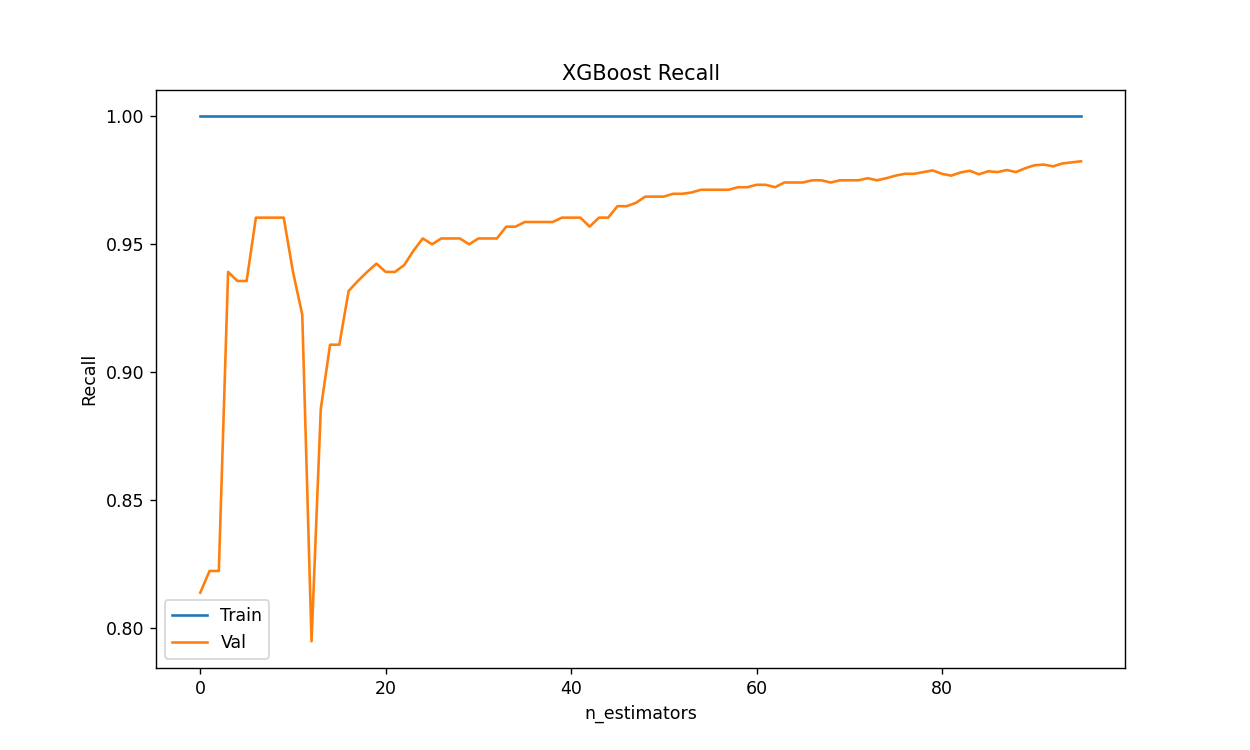

Text(0.5, 1.0, 'XGBoost Recall')

In [107]:
plt.rcParams['figure.figsize'] = [10, 6]
fig, ax = plt.subplots()
ax.plot(x_axis, evals_result['train']['Recall'], label='Train')
ax.plot(x_axis, evals_result['val']['Recall'], label='Val')
ax.legend()
plt.ylabel('Recall')
plt.xlabel('n_estimators')
plt.title('XGBoost Recall')

<IPython.core.display.Javascript object>


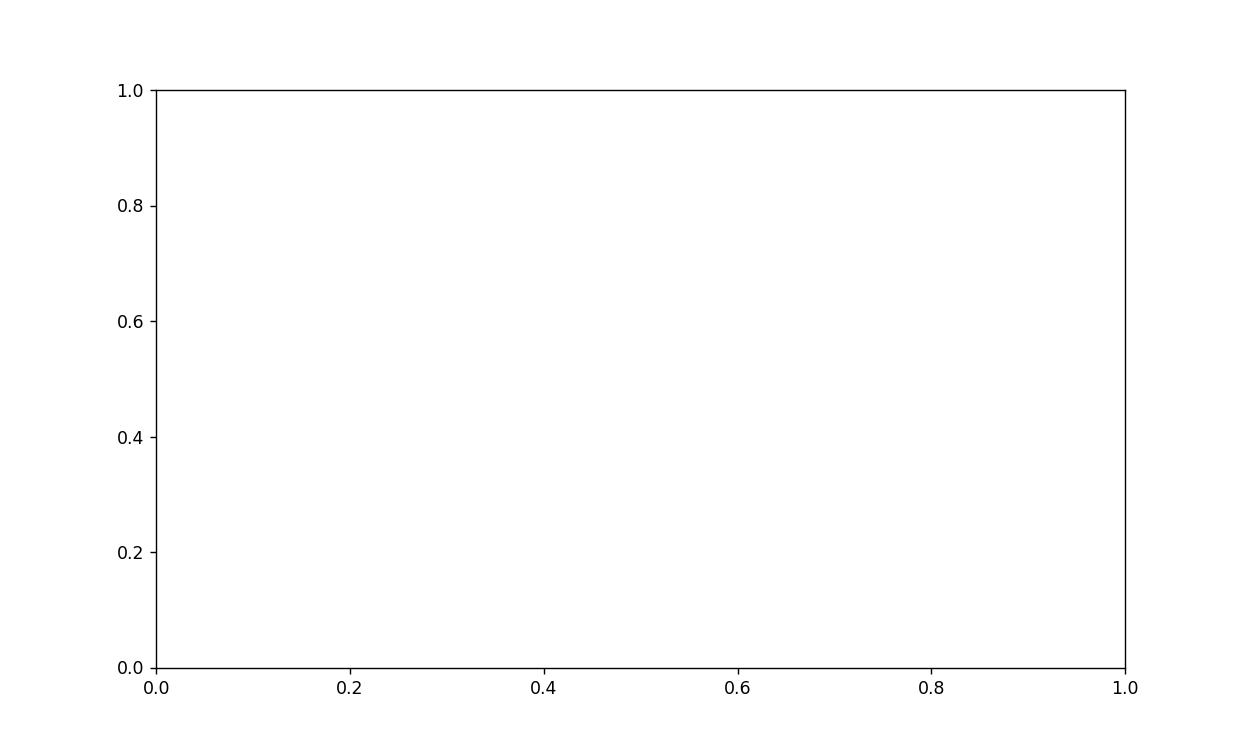

KeyError: 'Precision'

In [109]:
plt.rcParams['figure.figsize'] = [10, 6]
fig, ax = plt.subplots()
ax.plot(x_axis, evals_result['train']['Precision'], label='Train')
ax.plot(x_axis, evals_result['val']['Precision'], label='Val')
ax.legend()
plt.ylabel('Precision')
plt.title('XGBoost Precision')

<IPython.core.display.Javascript object>


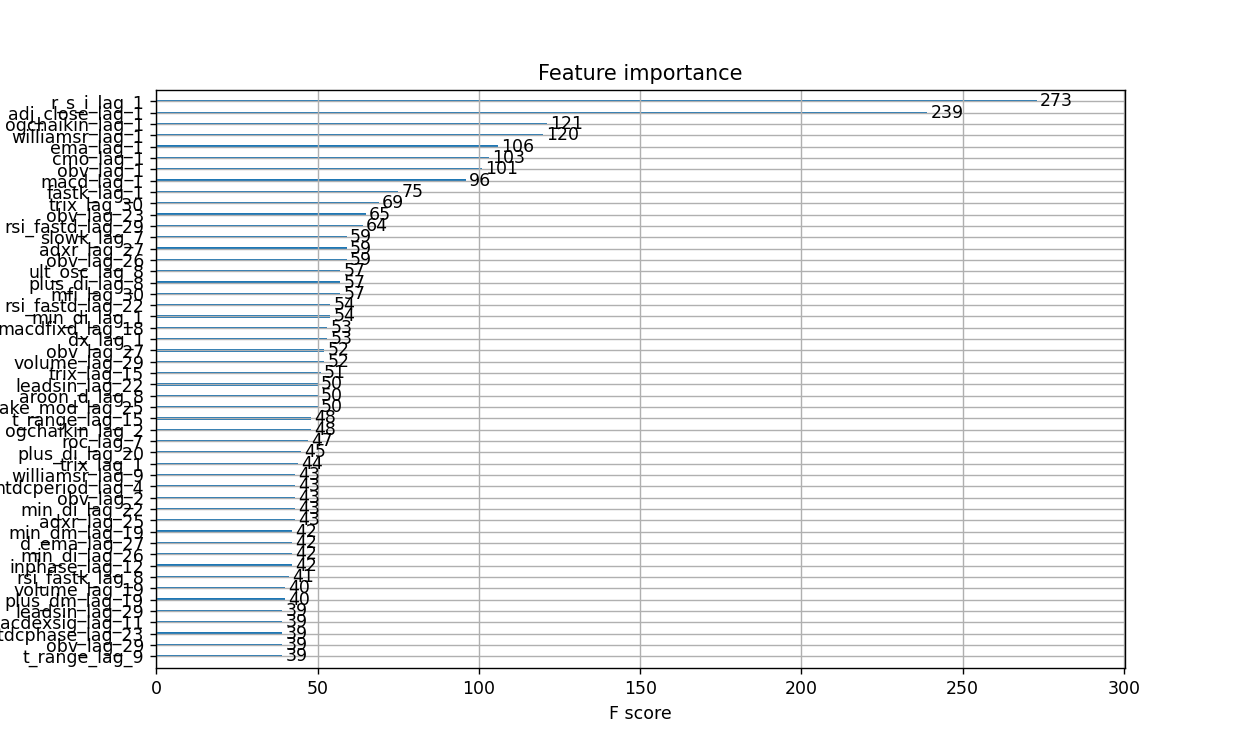

<IPython.core.display.Javascript object>


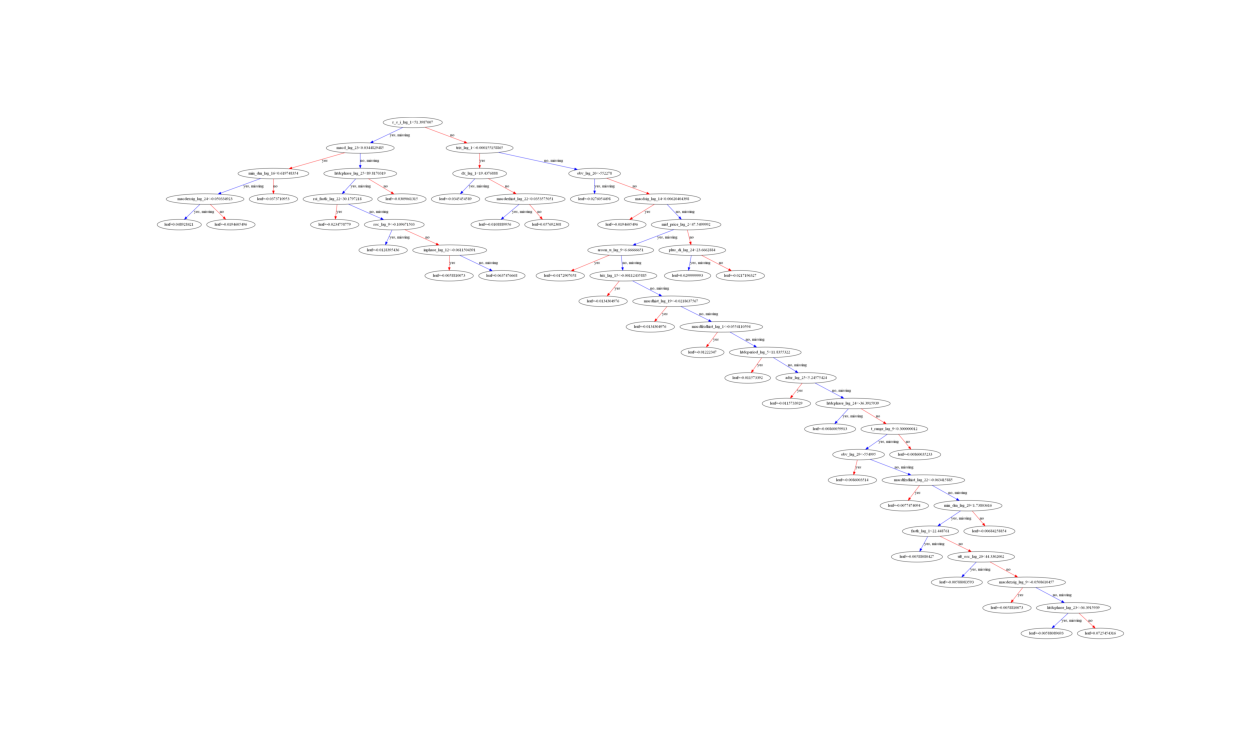

<AxesSubplot:>

In [110]:
plt.rcParams['figure.figsize'] = [10, 6]
xgb.plot_importance(bst, max_num_features = 50)
plt.rcParams['figure.figsize'] = [10, 6]
xgb.plot_tree(bst)



In [111]:
feature_important = bst.get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

In [112]:
feature_dict = dict(zip(keys, values))

In [113]:
my_keys = sorted(feature_dict, key=feature_dict.get, reverse=True)[:50]

In [114]:
print(my_keys)

['r_s_i_lag_1', 'adj_close_lag_1', 'ogchaikin_lag_1', 'williamsr_lag_1', 'ema_lag_1', 'cmo_lag_1', 'obv_lag_1', 'macd_lag_1', 'fastk_lag_1', 'trix_lag_30', 'obv_lag_23', 'rsi_fastd_lag_29', 'obv_lag_26', 'adxr_lag_27', 'slowk_lag_7', 'mfi_lag_30', 'plus_di_lag_8', 'ult_osc_lag_8', 'min_di_lag_1', 'rsi_fastd_lag_22', 'dx_lag_1', 'macdfixd_lag_18', 'volume_lag_29', 'obv_lag_27', 'trix_lag_15', 'hikkake_mod_lag_25', 'aroon_d_lag_8', 'leadsin_lag_22', 'ogchaikin_lag_2', 't_range_lag_15', 'roc_lag_7', 'plus_di_lag_20', 'trix_lag_1', 'adxr_lag_25', 'min_di_lag_22', 'obv_lag_2', 'htdcperiod_lag_4', 'williamsr_lag_9', 'inphase_lag_12', 'min_di_lag_26', 'd_ema_lag_27', 'min_dm_lag_19', 'rsi_fastk_lag_8', 'plus_dm_lag_19', 'volume_lag_19', 't_range_lag_9', 'obv_lag_29', 'htdcphase_lag_23', 'macdexsig_lag_11', 'leadsin_lag_29']


In [115]:
y_test.value_counts()
#BUY => 1, SELL => 0, HOLD => 2

2.0    1148
1.0     145
0.0      81
Name: labels, dtype: int64

In [116]:
preds_df.value_counts()
#BUY => 1, SELL => 0, HOLD => 2

2.0    1321
0.0      47
1.0       6
dtype: int64

In [117]:
from imblearn.metrics import classification_report_imbalanced
target_names = ['Sell', 'Buy', 'Hold']
print(classification_report_imbalanced(y_test.values, preds_df.values, target_names=target_names))

                   pre       rec       spe        f1       geo       iba       sup

       Sell       0.11      0.06      0.97      0.08      0.24      0.05        81
        Buy       1.00      0.04      1.00      0.08      0.20      0.04       145
       Hold       0.84      0.96      0.05      0.90      0.22      0.05      1148

avg / total       0.81      0.81      0.20      0.76      0.22      0.05      1374



In [118]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test.values.tolist(), preds_df.values.tolist())
conf_mat_norm = confusion_matrix(y_test.values.tolist(), preds_df.values.tolist(), normalize = 'true')
print(conf_mat)

[[   5    0   76]
 [   0    6  139]
 [  42    0 1106]]


<IPython.core.display.Javascript object>


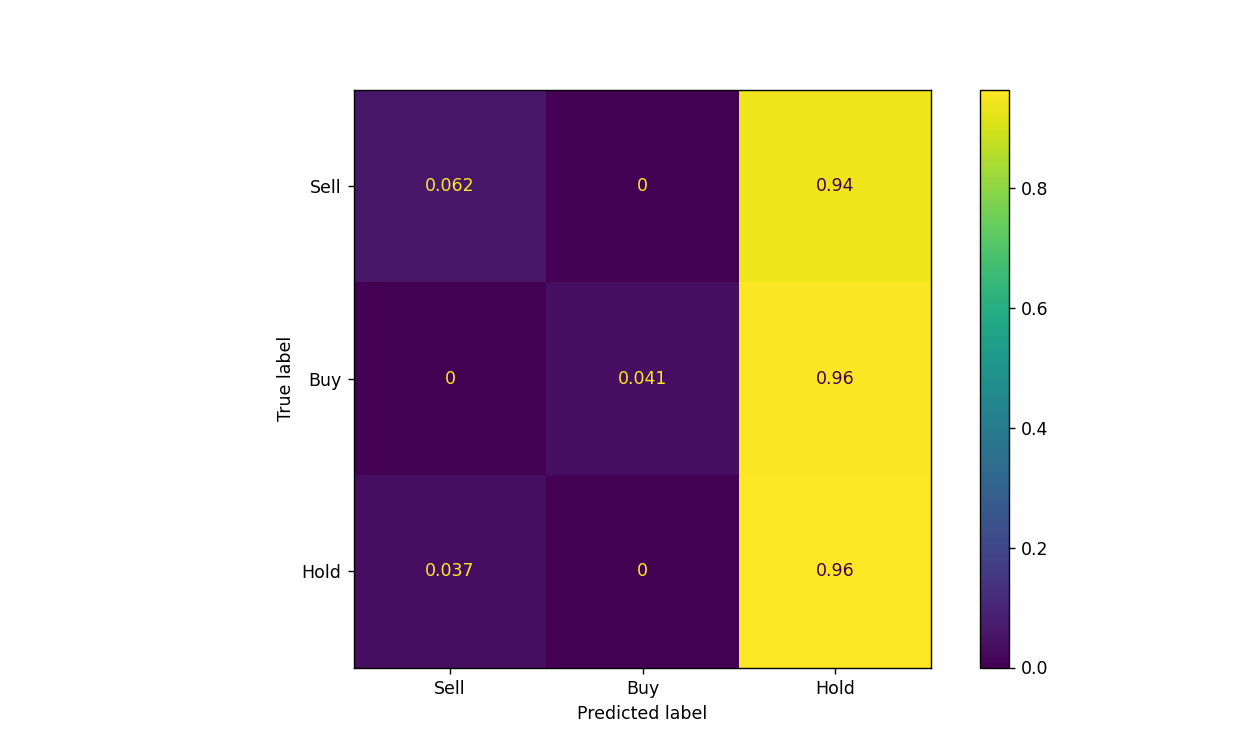

In [119]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(conf_mat_norm, display_labels = target_names)
disp.plot()

In [120]:
print(preds_df.values[-1])
#last class label
#plt.ylabel('BUY => 1, SELL => 0, HOLD => 2')
test_dates_list[-1:]

[2.]


6956   2021-03-17 17:02:00-04:00
Name: datetime, dtype: datetime64[ns, America/New_York]

In [121]:
#print(pred_frame)

In [122]:
buy_list_markers = preds_df.index[preds_df[0]==1].tolist()
sell_list_markers = preds_df.index[preds_df[0]==0].tolist()

In [123]:
#print(type(buy_list))

In [124]:
buy_list_true_markers = preds_df.index[y_test.values==1].tolist()
sell_list_true_markers = preds_df.index[y_test.values==0].tolist()

In [125]:
#sell_list_true_markers

<IPython.core.display.Javascript object>


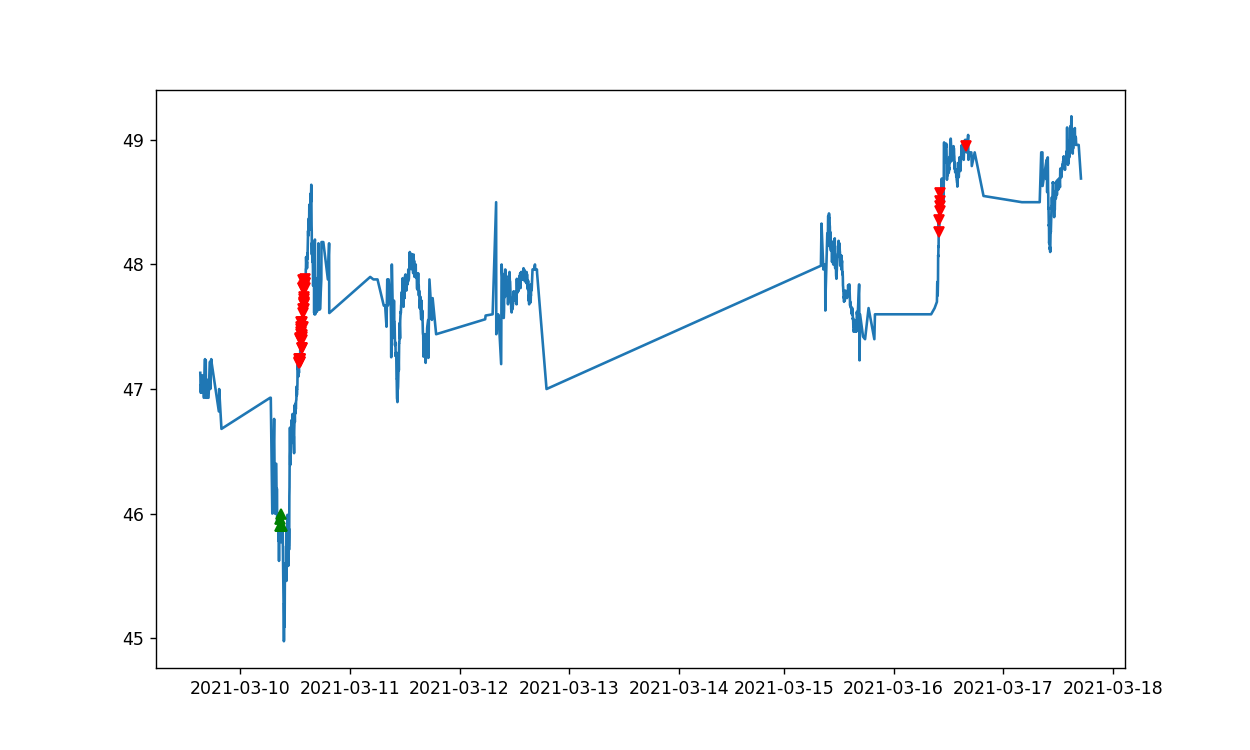

In [126]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(test_dates_list, test_close_vals)
plt.plot(test_dates_list, test_close_vals, 'g^', markevery=buy_list_markers)
plt.plot(test_dates_list, test_close_vals, 'rv', markevery=sell_list_markers)

<IPython.core.display.Javascript object>


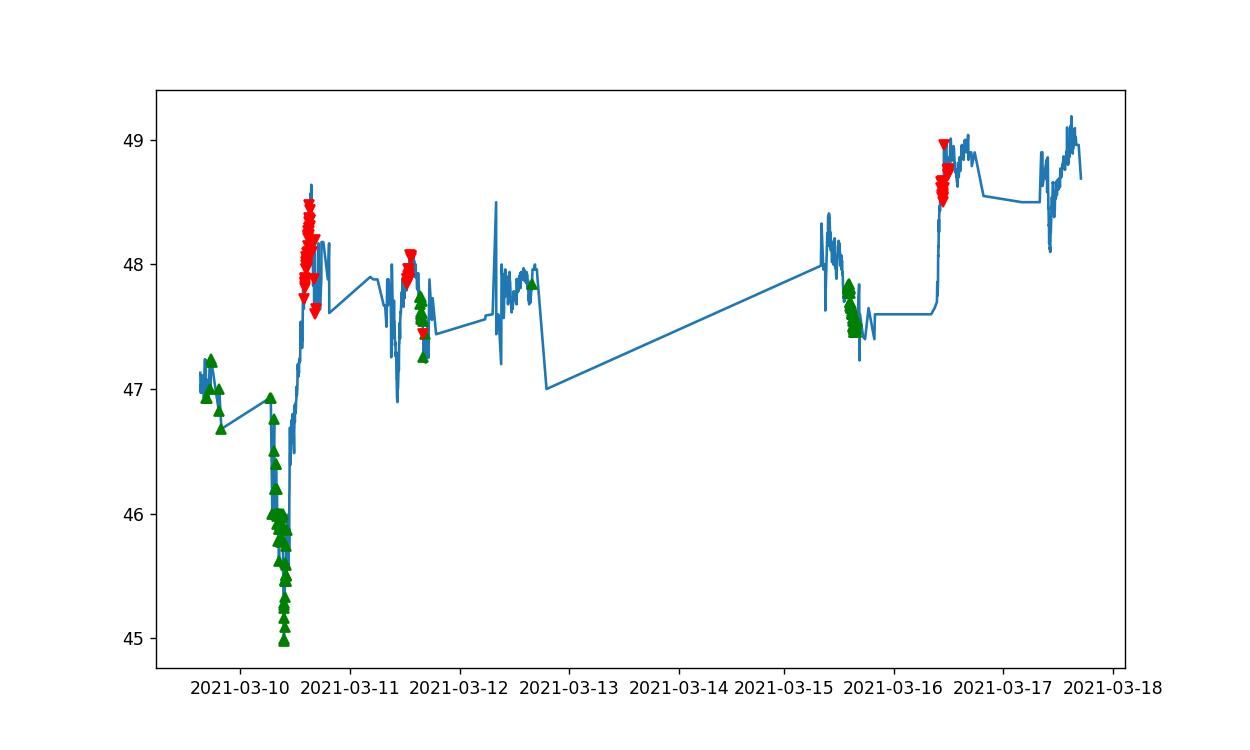

In [127]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [10, 6]
plt.plot(test_dates_list, test_close_vals)
plt.plot(test_dates_list, test_close_vals, 'g^', markevery = buy_list_true_markers)
plt.plot(test_dates_list, test_close_vals, 'rv', markevery = sell_list_true_markers[:-1])

In [ ]:
len(test_dates_list)